In [ ]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# 2. Loading the dataset

df = pd.read_csv('email_spam_dataset.csv')
# Display first few rows to check the structure
print(df.head())

   email_length  num_links  has_attachment  num_exclamations  is_spam
0          1176          2               1                 6        0
1           910          3               1                 2        0
2          1344          3               0                 7        0
3          1180          1               0                 2        1
4          1145          4               0                 0        1


In [ ]:
# 3. Prepare Features (X) and Target (y)
# Here we consider these 4 columns as features
X = df[['email_length', 'num_links', 'has_attachment', 'num_exclamations']]
y = df['is_spam']

In [ ]:
# 4. Split into training and testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [ ]:
# 5. Train the SVM Model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# 6. Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# 7. Evaluate Model's Performance
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29        17
           1       0.48      0.48      0.48        23

    accuracy                           0.40        40
   macro avg       0.39      0.39      0.39        40
weighted avg       0.40      0.40      0.40        40

Confusion Matrix:
[[ 5 12]
 [12 11]]


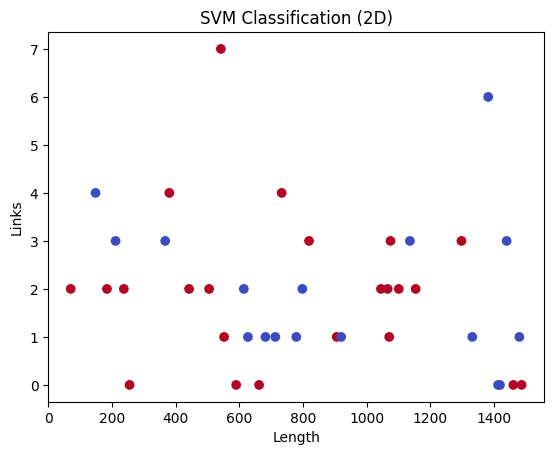

In [ ]:
# 8. Visualize

plt.scatter(X_test['email_length'], X_test['num_links'], c=y_pred, cmap='coolwarm')
plt.xlabel('Length')
plt.ylabel('Links')
plt.title('SVM Classification (2D)')
plt.show()